### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

## 1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8              1~3   
2        never       NaN                  4~8              1~3   
3        never       NaN                  4~8              1~3   
4        never       NaN                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0                 0              0   
2                1                 1                 0              0   
3                1                 1                 0              0   
4                1                 1                 0              0   

  direction_opp  Y  
0             1  1  
1             1  0  
2             1  1  
3             1  0  
4             1  0  

[5 rows x 26 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

## 2. Investigate the dataset for missing or problematic data.

### Investigate the dataset for misssing or problematic 

1. Remove duplicate rows
2. Fix spelling mistake for the passangar column by renaming it to passenger.
3. Remove the column toCoupon_GEQ5min as its  values remain the same for all rows.
4. Drop the column direction_opp as it is the inverse of the column direction_same.


### Remove duplicate rows

74 duplicate rows were removed.

In [5]:
#remove duplicates and print how many rows were removed
orig_row_count = data.shape[0]
data = data.drop_duplicates()
new_row_count = data.shape[0]

print("Original row count:", orig_row_count, " New row count:", new_row_count, "No of duplicate rows removed:", orig_row_count-new_row_count)

Original row count: 12684  New row count: 12610 No of duplicate rows removed: 74


###  Fix the spelling mistake for the 'passenger' column

In [6]:
#Fix the spelling mistake of the passenger column
data.rename(columns={'passanger': 'passenger'}, inplace=True)

In [7]:
data["passenger"].value_counts()

passenger
Alone        7248
Friend(s)    3292
Partner      1069
Kid(s)       1001
Name: count, dtype: int64

In [8]:
#replace (s) with s for the passenger column
data["passenger"] = data["passenger"].str.replace('(s)','s')

In [9]:
data["passenger"].value_counts()

passenger
Alone      7248
Friends    3292
Partner    1069
Kids       1001
Name: count, dtype: int64

### Remove the column toCoupon_GEQ5min as its  values remain the same for all rows.

In [10]:
# This function returns the list of columns that has the same value for all rows
def check_columns_with_same_values(df):
    data_cols = list(df.columns)
    cols_to_be_dropped =  list()
    for col in data_cols:
        col_dist = data[col].value_counts(ascending=False, normalize=True)
        for value, count in col_dist.items():
            if(count == 1.0):
                cols_to_be_dropped.append(col)
                # break out of the loop after checking the first entry as the list is ordered in the descending order 
                break;
    
    return cols_to_be_dropped
    


In [11]:
#Drop columns with the same value for all rows
cols_to_drop = check_columns_with_same_values(data)
print(" columns: ", cols_to_drop, " will be dropped as they contain the same value for all rows")
if(len(cols_to_drop)> 0):
    data = data.drop(cols_to_drop, axis=1)
for col in cols_to_drop:
    if (col not in data.columns):
        print("column ", col, " is dropped")

 columns:  ['toCoupon_GEQ5min']  will be dropped as they contain the same value for all rows
column  toCoupon_GEQ5min  is dropped


### Drop the column direction_opp as it is the inverse of the column direction_same.

In [12]:
# check whether direaction_same and direction_opp are inverse of each other
data["direction_same"].value_counts()



direction_same
0    9892
1    2718
Name: count, dtype: int64

In [13]:
data["direction_opp"].value_counts()

direction_opp
1    9892
0    2718
Name: count, dtype: int64

In [14]:
#Since direction_same and direction_opp columns are inverse of wach other, we can  keep direction_same and drop direction_opp
data = data.drop(['direction_opp'], axis=1)

## 3. Decide what to do about your missing data -- drop, replace, other...

### Check for null values 

1. Drop the 'car' column as  99.14% of the column values are null.
2. We can drop rows with null values for  columns (Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50 ) as they contribute to contribute to only 4.78% of the total row count.

In [15]:
# Check for null data and also print percent of rows that contain the null data
null_list = data.isnull().sum()
for col, null_count in null_list.items():
    if(null_count > 0):
        percent_null_rows = 100*null_count/data.shape[0]
        print(col,null_count, f"{percent_null_rows:0.2f}")   


car 12502 99.14
Bar 107 0.85
CoffeeHouse 217 1.72
CarryAway 150 1.19
RestaurantLessThan20 129 1.02
Restaurant20To50 189 1.50


In [16]:
#About 99.14% of values in the column 'car'are null. So let's drop it
data = data.drop(['car'], axis=1)


In [17]:
#drop other rows with null values as they contribute to only about 4.78% of the total row count.
row_count_before_null_rows_drop  = data.shape[0]
data = data.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20','Restaurant20To50'])
print("row count before null rows drop:", row_count_before_null_rows_drop, " New row count:", data.shape[0], 
      "Percent of rows removed:", f"{100* (row_count_before_null_rows_drop-data.shape[0])/row_count_before_null_rows_drop:0.2f}")

row count before null rows drop: 12610  New row count: 12007 Percent of rows removed: 4.78


In [18]:
#verify that there are no null values
data.isnull().sum()

destination             0
passenger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
Y                       0
dtype: int64

## 4. What proportion of the total observations chose to accept the coupon?



In [19]:
#value count plot with count and percentage labels.
def pretty_value_count_plot(df, col, plt_title=""):
    ax = sns.countplot(x=df[col], order = df['Y'].value_counts(ascending=False).index)
    if(len(plt_title) > 0):
        plt.title(plt_title)
    df_y_count = df[col].value_counts(ascending=False)
    df_y_pcnt  = df[col].value_counts(ascending=False, normalize=True).values*100
    df_y_lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(df_y_count, df_y_pcnt)]
    ax.bar_label(container=ax.containers[0], labels=df_y_lbls)
    plt.show()

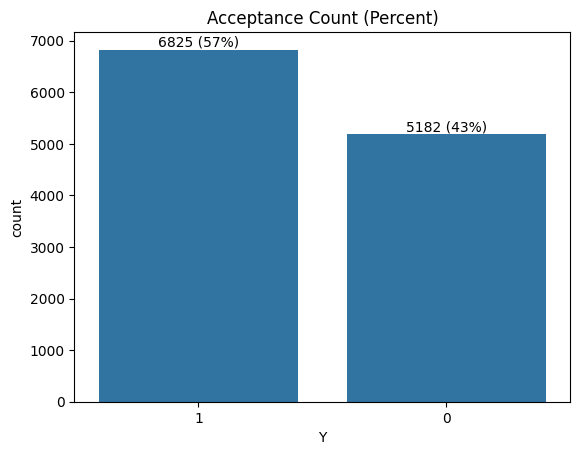

In [20]:
pretty_value_count_plot(data, 'Y', "Acceptance Count (Percent)")

<b> 57% of the customers decided to accept the coupon</b>.

## 5. Use a bar plot to visualize the `coupon` column.

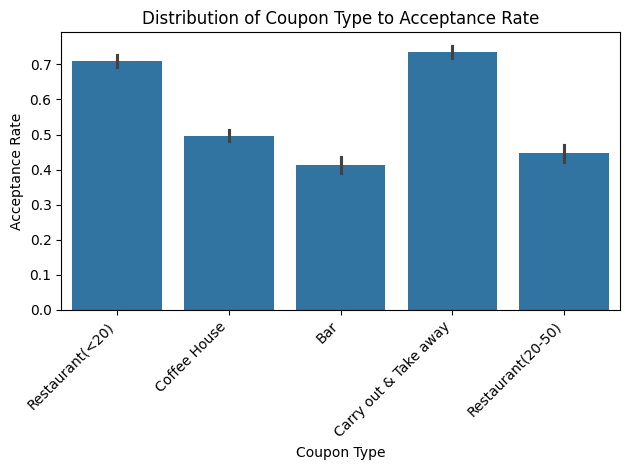

In [21]:
#Seaborn barplot
ax = sns.barplot(x="coupon", y="Y", data=data)

plt.xlabel("Coupon Type") 
plt.xticks(rotation=45, ha="right") 
plt.ylabel("Acceptance Rate") 
plt.title(f'Distribution of Coupon Type to Acceptance Rate')
plt.tight_layout()
plt.show()

**Box plot gives the statistical estimate of the 'Y' column. Since the default estimator is mean and  column Y has only 0 and 1 as values, this plot shows the acceptance rate for each coupon category**

In [22]:
#Counting accept and reject counts for each category
coupon_acceptance = data.groupby(["coupon","Y"])[["Y"]].count()
coupon_acceptance

Y
coupon                Y      
Bar                   0  1121
                      1   785
Carry out & Take away 0   590
                      1  1643
Coffee House          0  1921
                      1  1888
Restaurant(20-50)     0   782
                      1   631
Restaurant(<20)       0   768
                      1  1878

In [23]:
#calculating accept/reject percent for every coupon type
coupon_acceptance_pct = coupon_acceptance.groupby(level=0).apply(lambda x:
                                                 100 * (x / x.sum()))
coupon_acceptance_pct

Y
coupon                coupon                Y           
Bar                   Bar                   0  58.814271
                                            1  41.185729
Carry out & Take away Carry out & Take away 0  26.421854
                                            1  73.578146
Coffee House          Coffee House          0  50.433185
                                            1  49.566815
Restaurant(20-50)     Restaurant(20-50)     0  55.343241
                                            1  44.656759
Restaurant(<20)       Restaurant(<20)       0  29.024943
                                            1  70.975057

**Count plot which is similar to bar plot can show coupons accepted and rejected for each coupon category** 

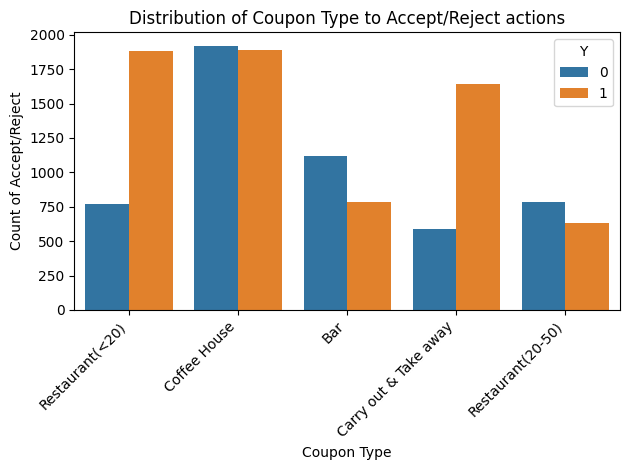

In [24]:
ax = sns.countplot(x="coupon", hue='Y', data=data)

plt.xlabel("Coupon Type") 
plt.xticks(rotation=45, ha="right") 
plt.ylabel("Count of Accept/Reject") 
plt.title(f'Distribution of Coupon Type to Accept/Reject actions')
plt.tight_layout()
plt.show()

#### Observations:

1. Carry out and Take away & Restaurant (<20)  coupons have excellent acceptance rates of over 70%.
2. Bar coupons have the lowest acceptance rate of about 41%.
3. CoffeeHouse and Restaurant(20-50) have coupon acceptance rates of 49.56% and 44.65% respectively.

## 6. Use a histogram to visualize the temperature column.

In [25]:
data["temperature"].value_counts(normalize=True)

temperature
80    0.513950
55    0.304156
30    0.181894
Name: proportion, dtype: float64

In [26]:
# Plotting distribution of temperature based on coupon accept/reject actions
px.histogram(data, x="temperature", color="Y", title="Distribution of temperature based on coupon accept/reject actions", text_auto=True)



In [27]:
#Counting accept and reject counts for each temperature category
temp_acceptance = data.groupby(["temperature","Y"])[["Y"]].count()
#calculating accept/reject percent for each temperature category 
temp_acceptance_pct = temp_acceptance.groupby(level=0).apply(lambda x:
                                                 100 * (x / x.sum()))
temp_acceptance_pct

Y
temperature temperature Y           
30          30          0  46.245421
                        1  53.754579
55          55          0  46.276013
                        1  53.723987
80          80          0  40.220386
                        1  59.779614

#### Histrogram for temperature columns and acceptance rate
1. The temperature column has only 3 values - 30F, 55F and 80F
2. On relative terms, more coupons were offerred at higher temperatures - 51.3%  at 80F, 30.3% at 55F and 18.2% at 30F
3. About 53% of coupons were accepted in Winter (temperature=30F, 55F) and about 60% of coupons were accepted in Summer (temperature=80F)

In [28]:
#Plotting distribution of temperature based on coupon types
px.histogram(data, x="temperature", color="coupon", title="Distribution of temperature based on coupon types")

In [29]:
#Counting  coupons offerred for (temperature, coupon) combination
temp_coupon = data.groupby(["temperature","coupon"])[["Y"]].count()
temp_coupon
#Percentage of coupons offerred for (temperature, coupon) combination

temp_coupon_pct = temp_coupon.groupby(level=0).apply(lambda x:
                                                 100 * (x / x.sum()))
temp_coupon_pct

Y
temperature temperature coupon                          
30          30          Bar                    18.223443
                        Carry out & Take away  32.509158
                        Coffee House           13.644689
                        Restaurant(20-50)      11.721612
                        Restaurant(<20)        23.901099
55          55          Bar                    24.917853
                        Carry out & Take away  14.950712
                        Coffee House           33.324206
                        Restaurant(20-50)       9.611172
                        Restaurant(<20)        17.196057
80          80          Bar                     9.690488
                        Carry out & Take away  15.832118
                        Coffee House           37.173878
                        Restaurant(20-50)      13.061092
                        Restaurant(<20)        24.242424

#### Histrogram for temperature columns and coupon types
1. Maximum number of Carry and Takeaway coupons were offerred in Winter (30F)
2. Maximum number of Coffee House coupons were offerred when the temperature was 55F and 80F

## **Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

### 1. Create a new `DataFrame` that contains just the bar coupons.


In [30]:
#bar coupon dataframe
bar_data = data[data['coupon'] == "Bar"]
bar_data.shape[0]

1906

### 2. What proportion of bar coupons were accepted?


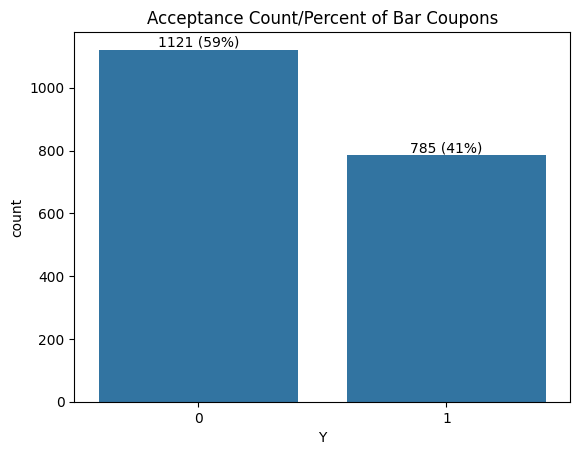

In [31]:
#Distribution of bar coupon acceptance/rejections
pretty_value_count_plot(bar_data, 'Y', "Acceptance Count/Percent of Bar Coupons")

<b>41% of bar coupons were accepted. </b>

### 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [32]:
#Run a query to get data for those who go to bar 3 or fewer times
bar_less_3_cols = ["never", "less1", "1~3"]
bar_less_3 = bar_data.query("Bar in @bar_less_3_cols")

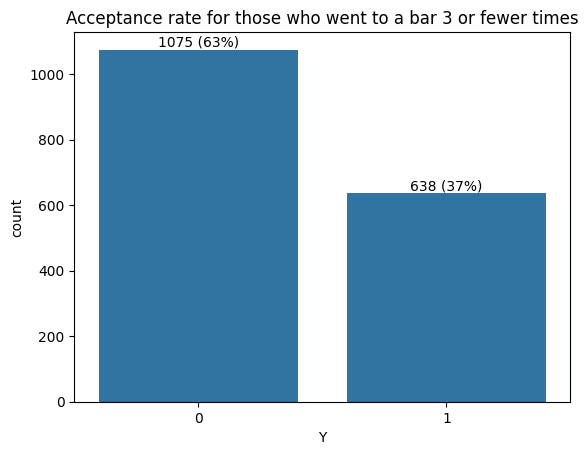

In [33]:
pretty_value_count_plot(bar_less_3, 'Y', "Acceptance rate for those who went to a bar 3 or fewer times")

**The acceptance rate for those who go to the bar 3 or fewer times is 37%**.<br>


In [34]:
#Run a query to get data for those who go to bar more than 3 times

bar_more_3_cols = ["4~8", "gt8"]
bar_more_3 = bar_data.query("Bar in @bar_more_3_cols")

In [35]:
#Get the acceptance rate using the value_counts function
bar_more_3["Y"].value_counts(normalize=True)

Y
1    0.761658
0    0.238342
Name: proportion, dtype: float64

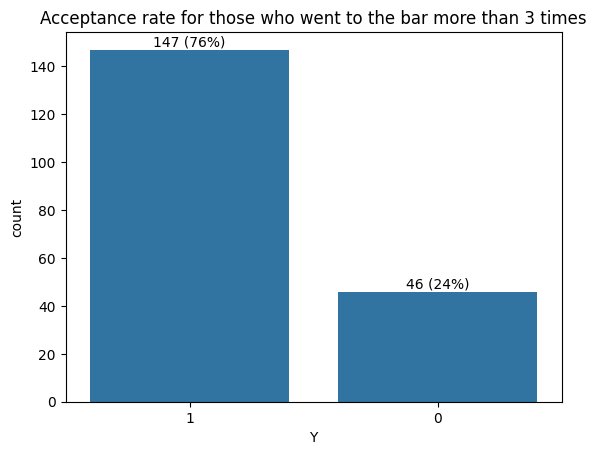

In [36]:
pretty_value_count_plot(bar_more_3, 'Y', "Acceptance rate for those who went to the bar more than 3 times")

**The acceptance rate for those who go to the bar more than 3 times is 76%**.

### 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [37]:
#List age categories
bar_data['age'].value_counts()

age
21         397
26         368
31         321
50plus     273
36         196
41         171
46          99
below21     81
Name: count, dtype: int64

In [38]:
#list bar visit categories
bar_data['Bar'].value_counts()

Bar
never    788
less1    546
1~3      379
4~8      147
gt8       46
Name: count, dtype: int64

In [39]:

# list to look for  membership in the query
go_to_bar_mt_once = ["1~3","4~8","gt8"]

# list to look for absence of membership in the query
age_lt_25_target = ["below21", "21"]

#Query to find out drivers who go to a bar more than once a month and are over the age of 25 
q4_target  = bar_data.query ("Bar in @go_to_bar_mt_once and age not in @age_lt_25_target")



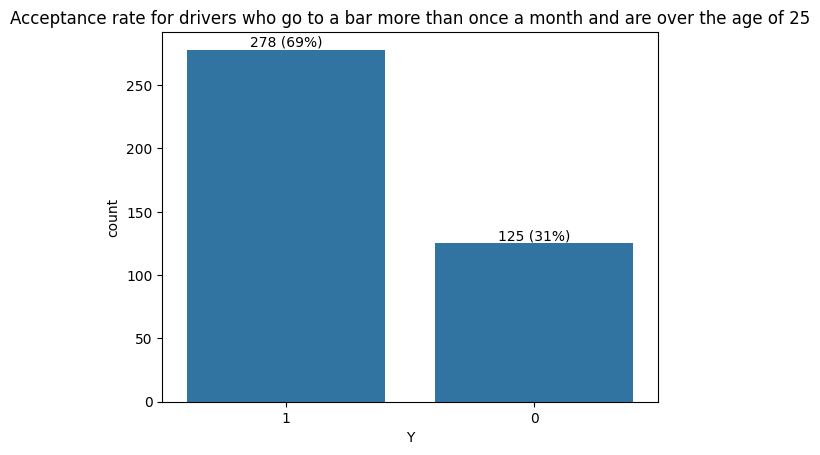

In [40]:
pretty_value_count_plot(q4_target, 'Y', "Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25")

<b>Acceptance rate for those driver who go to the bar more than once a month and is over 25 years of age is 69%</b>.

In [41]:
#get the data for the other category
q4_others =  bar_data.drop(q4_target.index)
print("bar data size:", bar_data.shape[0],"q4_target size:",q4_target.shape[0], "q4_others size:", q4_others.shape[0])

bar data size: 1906 q4_target size: 403 q4_others size: 1503


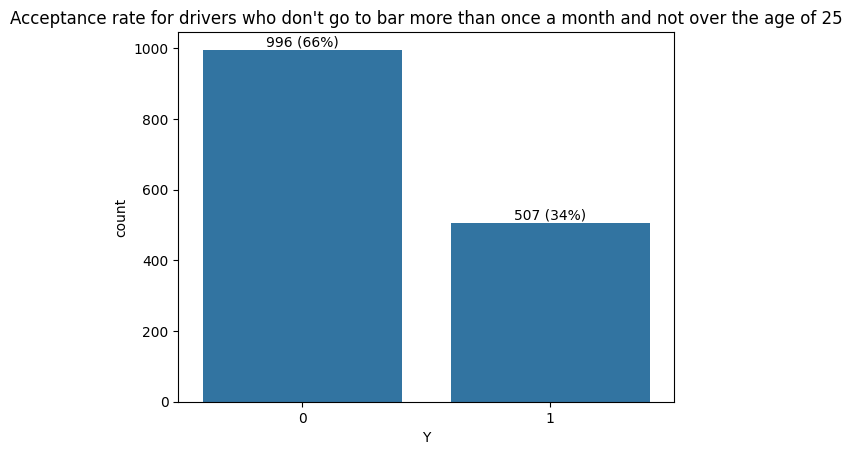

In [42]:
pretty_value_count_plot(q4_others, 'Y', "Acceptance rate for drivers who don't go to bar more than once a month and not over the age of 25")

<b> Acceptance rate for others is 34%<b>.

### 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [43]:
bar_data["passenger"].value_counts()

passenger
Alone      1139
Friends     316
Partner     259
Kids        192
Name: count, dtype: int64

In [44]:
# Query to find out drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other 
# than farming, fishing, or forestry.
q5_target = bar_data.query("Bar in @go_to_bar_mt_once and passenger!= 'Kid(s)' and occupation!='Farming Fishing & Forestry'")
q5_target.shape[0]

572

In [45]:
q5_target["Y"].value_counts(normalize=True)

Y
1    0.685315
0    0.314685
Name: proportion, dtype: float64

<b> Acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is 70.94% </b>

In [46]:
q5_others = bar_data.drop(q5_target.index)
print("bar data size:", bar_data.shape[0],"q5 target size:",q5_target.shape[0], "q5 others size:", q5_others.shape[0])


bar data size: 1906 q5 target size: 572 q5 others size: 1334


In [47]:
q5_others["Y"].value_counts(normalize=True)

Y
0    0.705397
1    0.294603
Name: proportion, dtype: float64

<b>Q5 Acceptance rate for others is 29.72%</b>.

**I am not calling pretty_value_count_plot for Q5 and Q6  to be able to review it easily**

### 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



### Acceptance rate for drivers going to bars more than once a month, had passengers that were not a kid, and were not widowed

In [48]:
bar_data["maritalStatus"].value_counts()

maritalStatus
Married partner      826
Single               638
Unmarried partner    352
Divorced              73
Widowed               17
Name: count, dtype: int64

In [49]:
# list to look for more than once a month bar visit membership in the query
go_to_bar_mt_once = ["1~3","4~8","gt8"]

In [50]:
#query - go to bars more than once a month, had passengers that were not a kid, and were not widowed
q6_1_target = bar_data.query("Bar in @go_to_bar_mt_once and passenger!= 'Kid(s)' and maritalStatus!='Widowed'")

In [51]:
q6_1_target["Y"].value_counts(normalize=True)

Y
1    0.685315
0    0.314685
Name: proportion, dtype: float64

<b> The acceptance rate for drivers who goes to bars more than once a month, had passengers that were not a kid, and were not widowed is 70.94%</b>

### Acceptance rate for drivers who goes to bars more than once a month and are under the age of 30

In [52]:
# list to look for  membership in the query
age_under_30 = ["below21", "21", "26"]

#query - go to bars more than once a month and are under the age of 30
q6_2_target = bar_data.query("Bar in @go_to_bar_mt_once and age in @age_under_30");

In [53]:
q6_2_target["Y"].value_counts(normalize=True)

Y
1    0.719512
0    0.280488
Name: proportion, dtype: float64

<b> The acceptance rate for drivers who goes to bars more than once a month and are under the age of 30 is 71.95%</b>

## Acceptance rate for drivers who goes to cheap restaurants more than 4 times a month and income is less than 50K.

In [54]:
bar_data["income"].value_counts().sort_values()

income
$62500 - $74999     129
$87500 - $99999     129
$75000 - $87499     143
Less than $12500    159
$37500 - $49999     247
$50000 - $62499     249
$12500 - $24999     271
$100000 or More     279
$25000 - $37499     300
Name: count, dtype: int64

In [55]:
bar_data["RestaurantLessThan20"].value_counts()

RestaurantLessThan20
1~3      839
4~8      545
less1    308
gt8      186
never     28
Name: count, dtype: int64

In [56]:
# The acceptance rate for drivers who goes to cheap restaurants more than 4 times a month and income is less than 50K
income_lt_50K = ["Less than $12500", "$25000 - $37499", "$37500 - $49999"]
eats_at_cheap_rest_mt_4times = ["4~8", "gt8"]
q6_3_target = bar_data.query("income in @income_lt_50K and RestaurantLessThan20 in @eats_at_cheap_rest_mt_4times");

In [57]:
q6_3_target["Y"].value_counts(normalize=True)

Y
0    0.531646
1    0.468354
Name: proportion, dtype: float64

<b> The acceptance rate for drivers who goes to cheap restaurants more than 4 times a month and income is less than 50K is 46.83% </b>

### 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

#### Based on these observations, I see that drivers who go to bars more than once a month tend to accept the Bar coupon.

In [58]:
# list to look for more than once a month bar visit membership in the query
go_to_bar_mt_once = ["1~3","4~8","gt8"]
df = bar_data.query("Bar in @go_to_bar_mt_once")

df['Y'].value_counts(normalize=True)

Y
1    0.685315
0    0.314685
Name: proportion, dtype: float64

#### By filtering the bar data based on drivers who go to bars more than once a month, we see that acceptance rate is 68.5%

In order to better understand how bar visit frequency correlate to  other features , I am going to call corr() func on the bar coupon dataframe. In order to use the function, I need to convert categorical column into a numerical column by using one hot encoding method.

In [59]:
def one_hot_encode(df, col, prefix):
    split_cols = pd.get_dummies(df[[col]], prefix)
    df_with_new_cols = pd.concat([df,split_cols], axis = 1)
    for col, series in split_cols.items():
        df_with_new_cols[col] =  df_with_new_cols[col].astype(int)
    return df_with_new_cols

In [60]:
def draw_heatmap(df, log_str):
    numerical_subset_df = df.select_dtypes(include=['int64','float64'])
    corr_df = numerical_subset_df.corr()
    plt.figure(figsize=(16, 16))  # Adjust the size as needed
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Heatmap for {log_str}')
    plt.show()

In [61]:
bar_df = data[data['coupon'] == "Bar"]
cols_to_one_hot_encode = [['Bar', 'BAR_VISIT']]
for feature in cols_to_one_hot_encode:
    bar_df = one_hot_encode(bar_df, feature[0], feature[1])
bar_df.head(5)

destination passenger weather  temperature  time coupon expiration  \
24  No Urgent Place   Friends   Sunny           80  10AM    Bar         1d   
35             Home     Alone   Sunny           55   6PM    Bar         1d   
39             Work     Alone   Sunny           55   7AM    Bar         1d   
46  No Urgent Place   Friends   Sunny           80  10AM    Bar         1d   
57             Home     Alone   Sunny           55   6PM    Bar         1d   

   gender age maritalStatus  ...  Restaurant20To50 toCoupon_GEQ15min  \
24   Male  21        Single  ...             less1                 0   
35   Male  21        Single  ...             less1                 0   
39   Male  21        Single  ...             less1                 1   
46   Male  46        Single  ...             never                 0   
57   Male  46        Single  ...             never                 0   

   toCoupon_GEQ25min direction_same  Y BAR_VISIT_1~3 BAR_VISIT_4~8  \
24                 0              0  1             0             0   
35                 0              1  1             0             0   
39                 1              0  1             0             0   
46                 0              0  0             0             0   
57                 0              1  0             0             0   

   BAR_VISIT_gt8 BAR_VISIT_less1  BAR_VISIT_never  
24             0               0                1  
35             0               0                1  
39             0               0                1  
46             0               0                1  
57             0               0                1  

[5 rows x 28 columns]

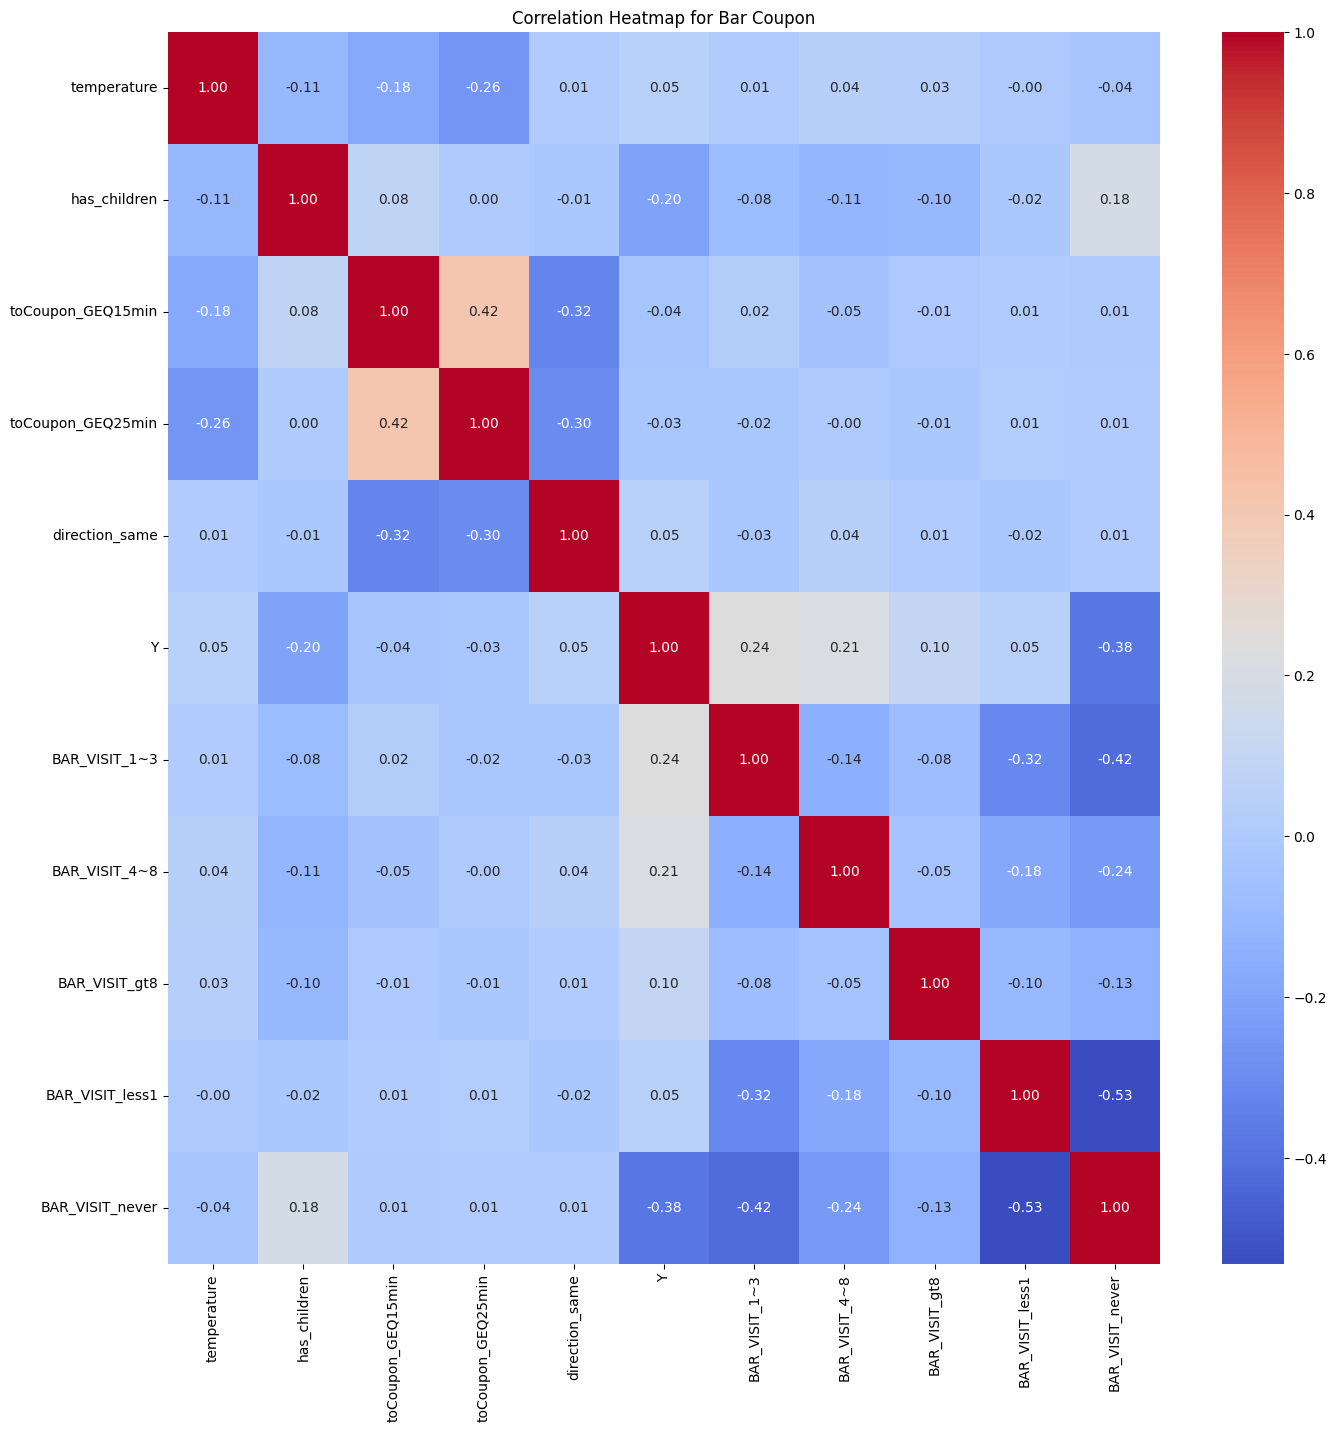

In [62]:
draw_heatmap(bar_df, "Bar Coupon")

### The heat map shows the following for those who received the Bar coupon.
1. Going to Bar more than once has a positive coorelation to acceptance
2. The correlation to acceptance for someone going to the bar 1-3 times is more than someone going to bar 4-8 times is more than someone going to the bat more than 8 times.
3. temperature and same_direction also correlate positively the acceptance decision.


## Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Analyze the 'Restaurant(<20)' coupons

In [63]:
#data frame for Restaurant(<20) coupons
res_lt_20_df = data[data['coupon'] == "Restaurant(<20)"]

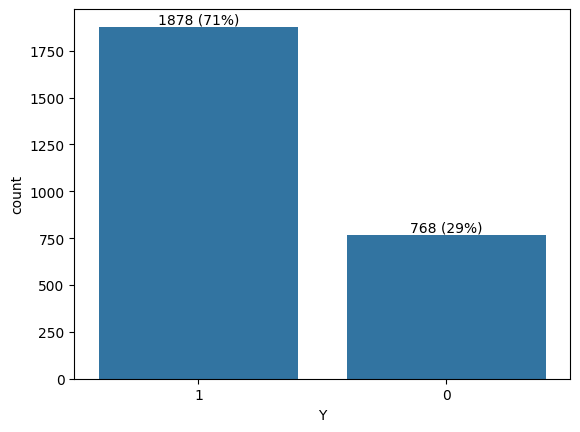

In [64]:
pretty_value_count_plot(res_lt_20_df, 'Y')

#### 71% of offerred Restaurant(<20) coupons were accepted.

### 1. How many drivers accepted the Restaurant(<20)  when the weather was Sunny and the passenger was Alone ?

In [65]:
rlt20_q1_target = res_lt_20_df.query("weather=='Sunny' and passenger=='Alone'")
rlt20_q1_target.shape[0]

1000

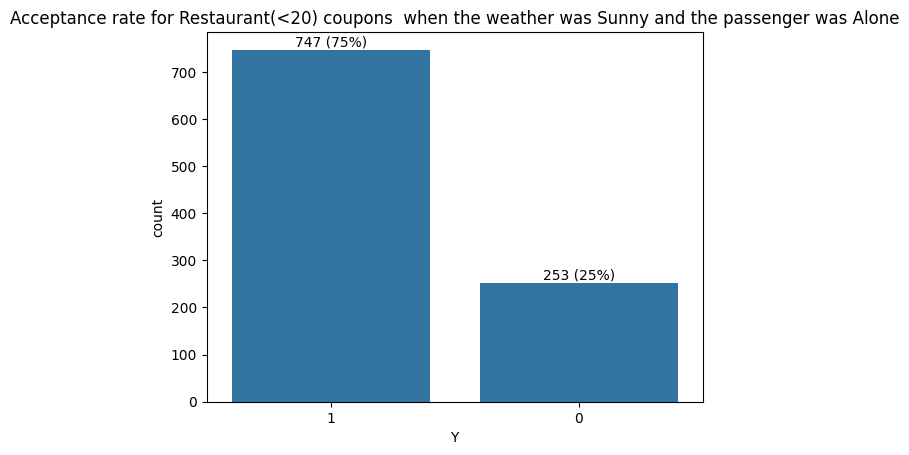

In [66]:
pretty_value_count_plot(rlt20_q1_target, 'Y', "Acceptance rate for Restaurant(<20) coupons  when the weather was Sunny and the passenger was Alone")

<b> Acceptance rate for Restaurant(<20) coupons  when the weather was Sunny and the passenger was Alone is 75%</b>

### 2. How many drivers accepted the Restaurant(<20)  when the weather was not Sunny and the passenger was Alone ?

In [67]:
#query fo Acceptance rate for Restaurant(<20) coupons  when the weather was not Sunny and the passenger was  Alone
rlt20_q2_target = res_lt_20_df.query("weather!='Sunny' and passenger=='Alone'")


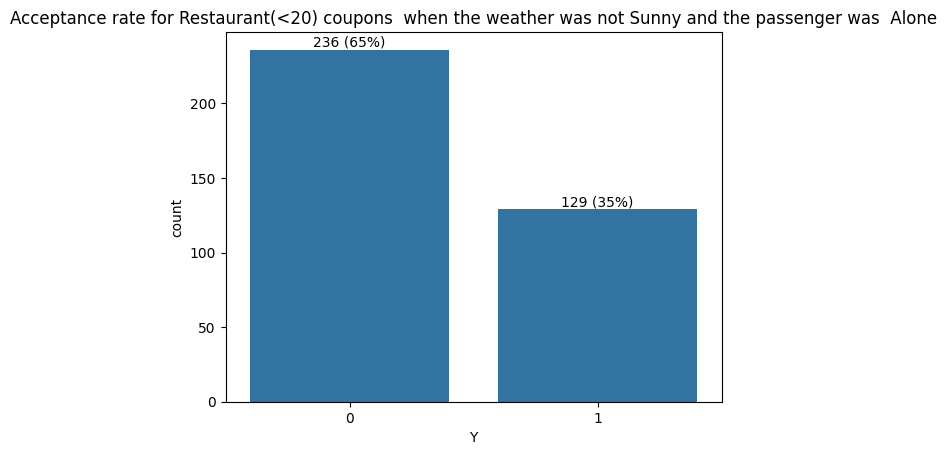

In [68]:
pretty_value_count_plot(rlt20_q2_target, 'Y', "Acceptance rate for Restaurant(<20) coupons  when the weather was not Sunny and the passenger was  Alone")


<b> Acceptance rate for Restaurant(<20) coupons  when the weather was not Sunny and the passenger was Alone is 35%</b>

### 3. How many drivers accepted the Restaurant(<20)  when the weather was Sunny and coupon expiration was 1d?

In [69]:
rlt20_q3_target = res_lt_20_df.query("weather=='Sunny' and expiration=='1d'")

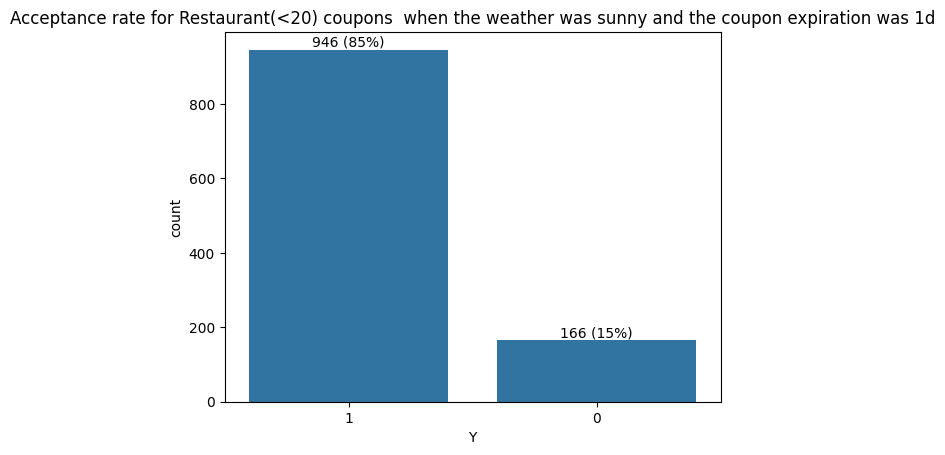

In [70]:
pretty_value_count_plot(rlt20_q3_target, 'Y', "Acceptance rate for Restaurant(<20) coupons  when the weather was sunny and the coupon expiration was 1d")

<b>Acceptance rate for Restaurant(<20) coupons  when the weather was Sunny and the expiration is 1d is 85%</b>

### 4. How many drivers accepted the Restaurant(<20)  when the weather was Sunny and coupon expiration was 2h?

In [71]:
rlt20_q4_target = res_lt_20_df.query("weather=='Sunny' and expiration=='2h'")

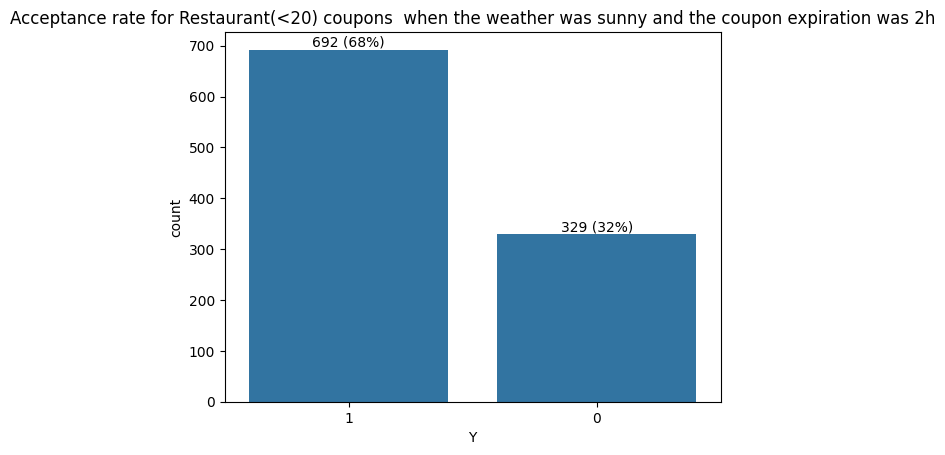

In [72]:
pretty_value_count_plot(rlt20_q4_target, 'Y', "Acceptance rate for Restaurant(<20) coupons  when the weather was sunny and the coupon expiration was 2h")

<b>Acceptance rate for Restaurant(<20) coupons  when the weather was Sunny and the expiration is 2h is 68%</b>

### 5. How many drivers accepted the Restaurant(<20)  when the  distance to the restaurant was 25 mins and coupon expiration was 2h?

In [73]:
rlt20_q5_target = res_lt_20_df.query("toCoupon_GEQ25min == 1  and expiration=='2h'")

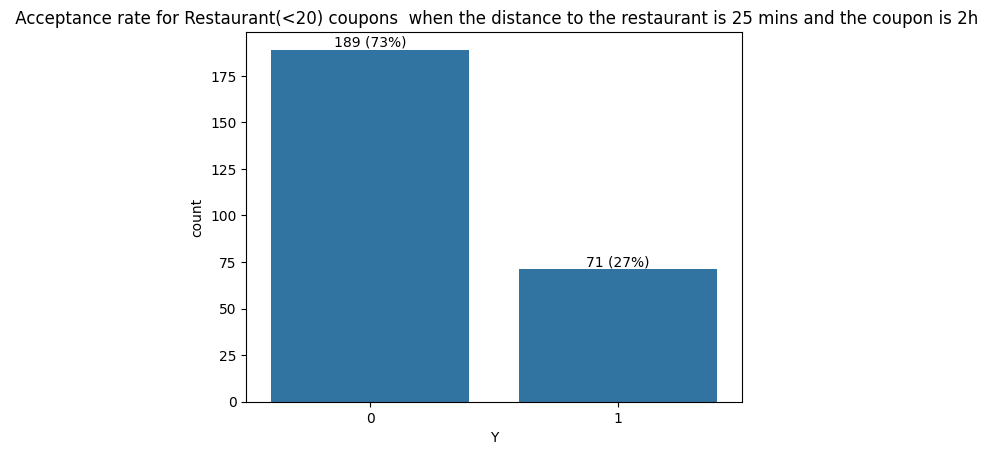

In [74]:
pretty_value_count_plot(rlt20_q5_target, 'Y', " Acceptance rate for Restaurant(<20) coupons  when the distance to the restaurant is 25 mins and the coupon is 2h")

<b>Acceptance rate for Restaurant(<20) coupons  when the distance to the restaurant is 25 mins and the coupon is 2h is 27%</b>

#### Let's look at the distribution of acceptance for all categorical features using count plots

In [75]:
# Count plot of all categorical variables with acceptance column as hue
def plot_categorical_variables_pretty(df, log_str):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns  # Adjust as necessary
    for col in categorical_columns:
        # I am skipping occupation as there are too many categories and the plot becomes harder to render. 
        # When I checked it manually, I don't see any one category influencing the acceptance
        if col != 'Y' and col != 'occupation':
            plt.figure(figsize=(10, 10))
            ax = sns.countplot(x=col, hue='Y', data=df)
            plot_title = log_str + " for " + col
            plt.title(f'{plot_title}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            for p in ax.patches:
                ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center',xytext=(0, 10),  textcoords='offset points')
            
            plt.show()

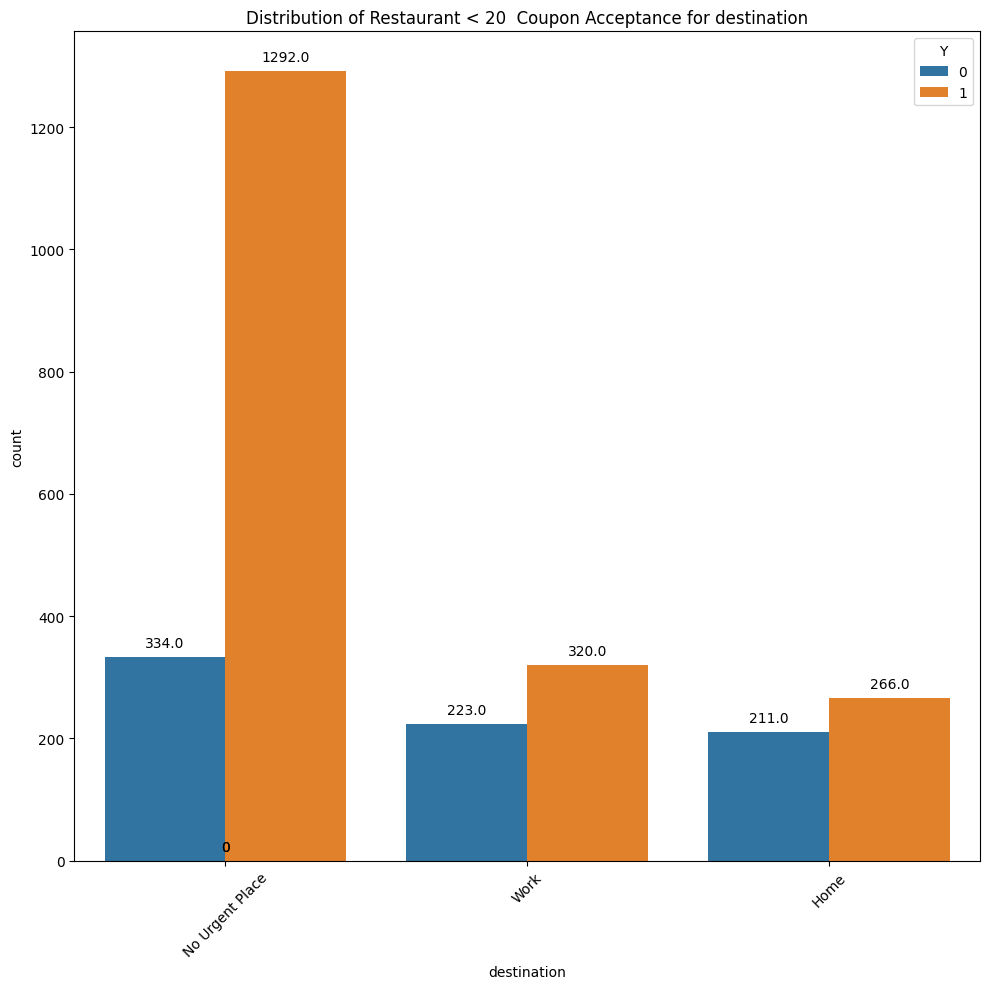

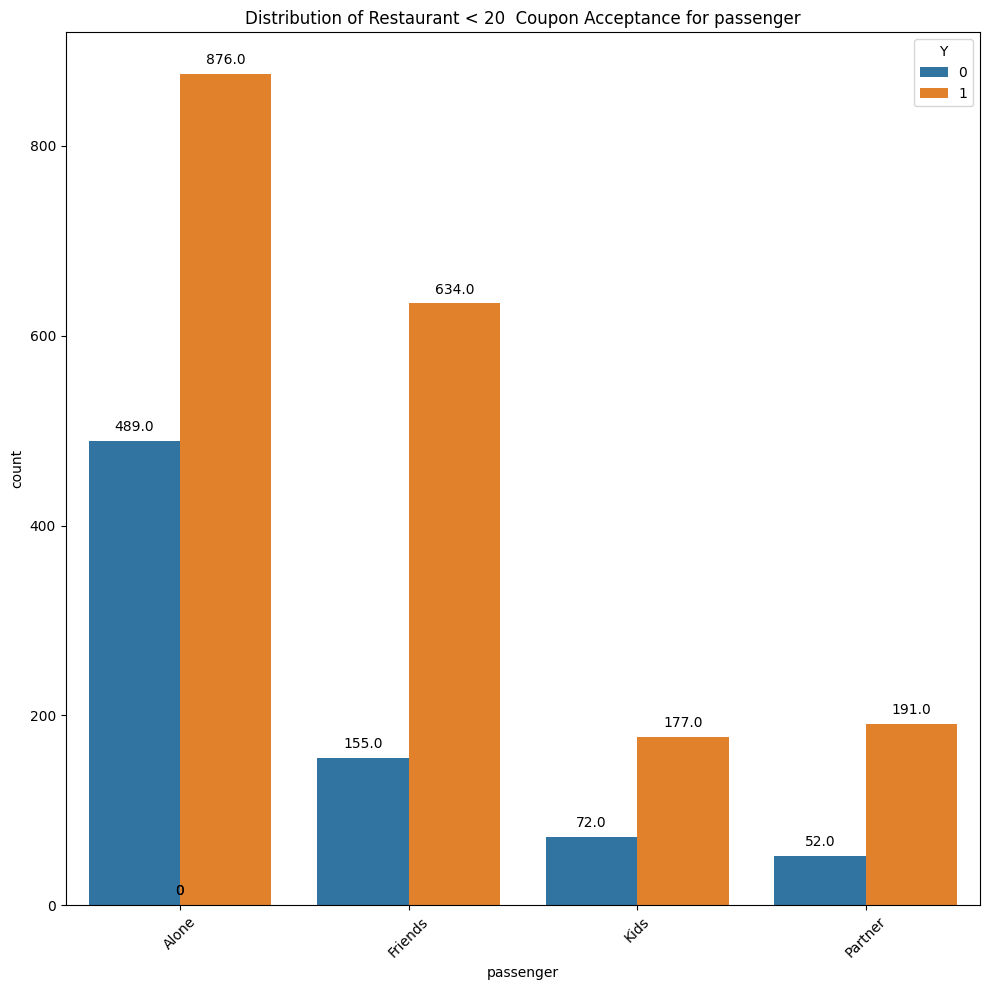

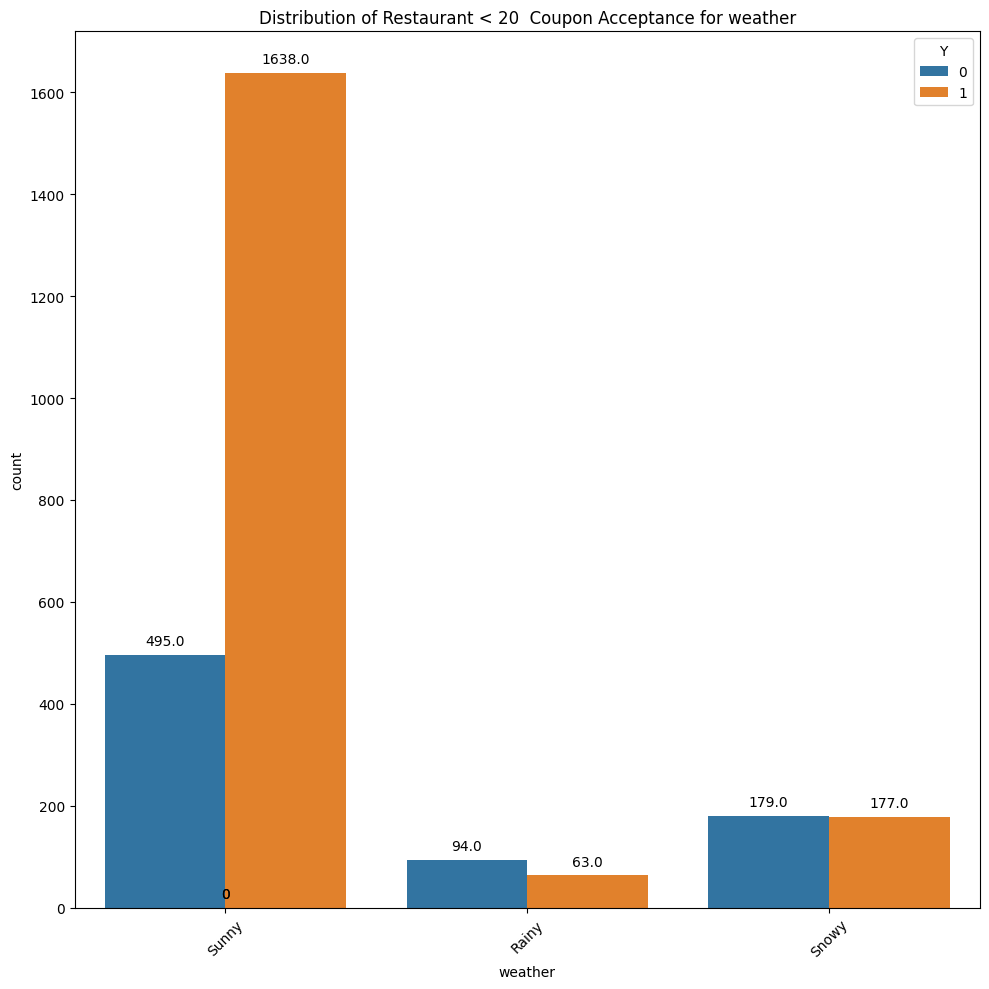

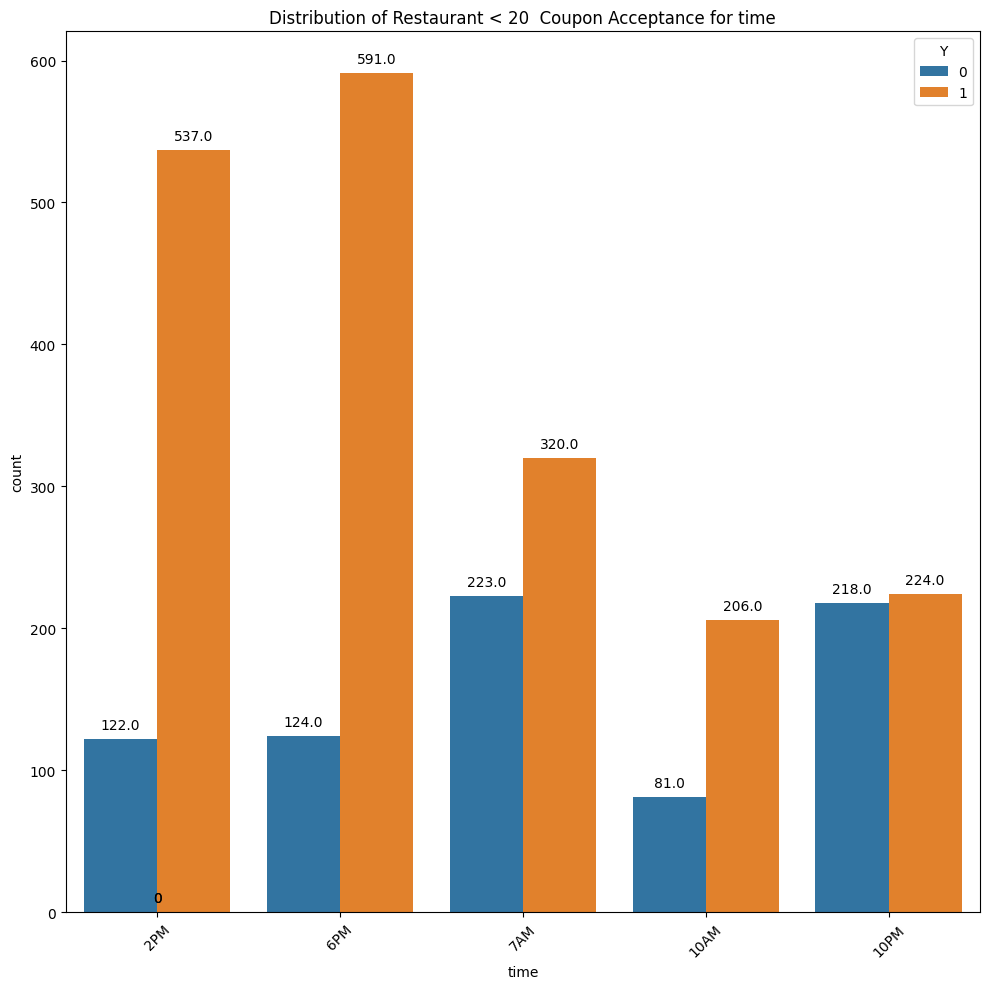

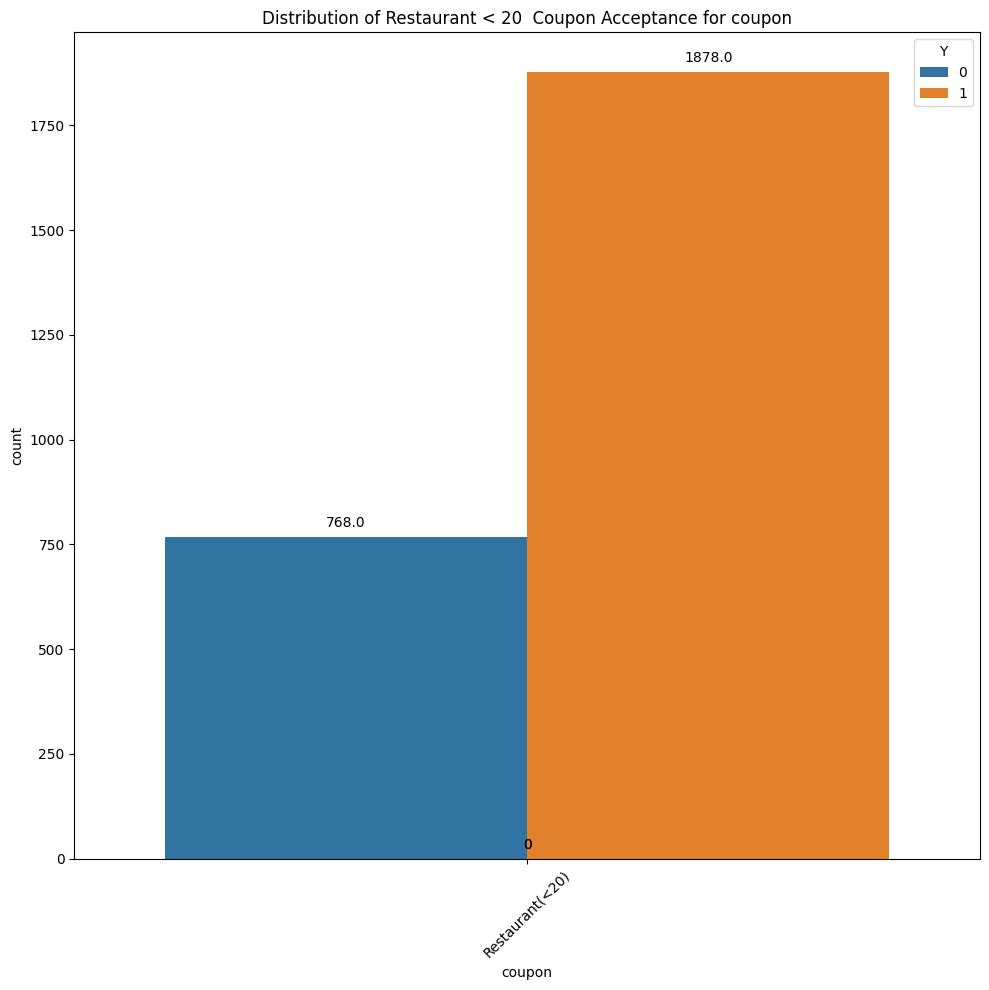

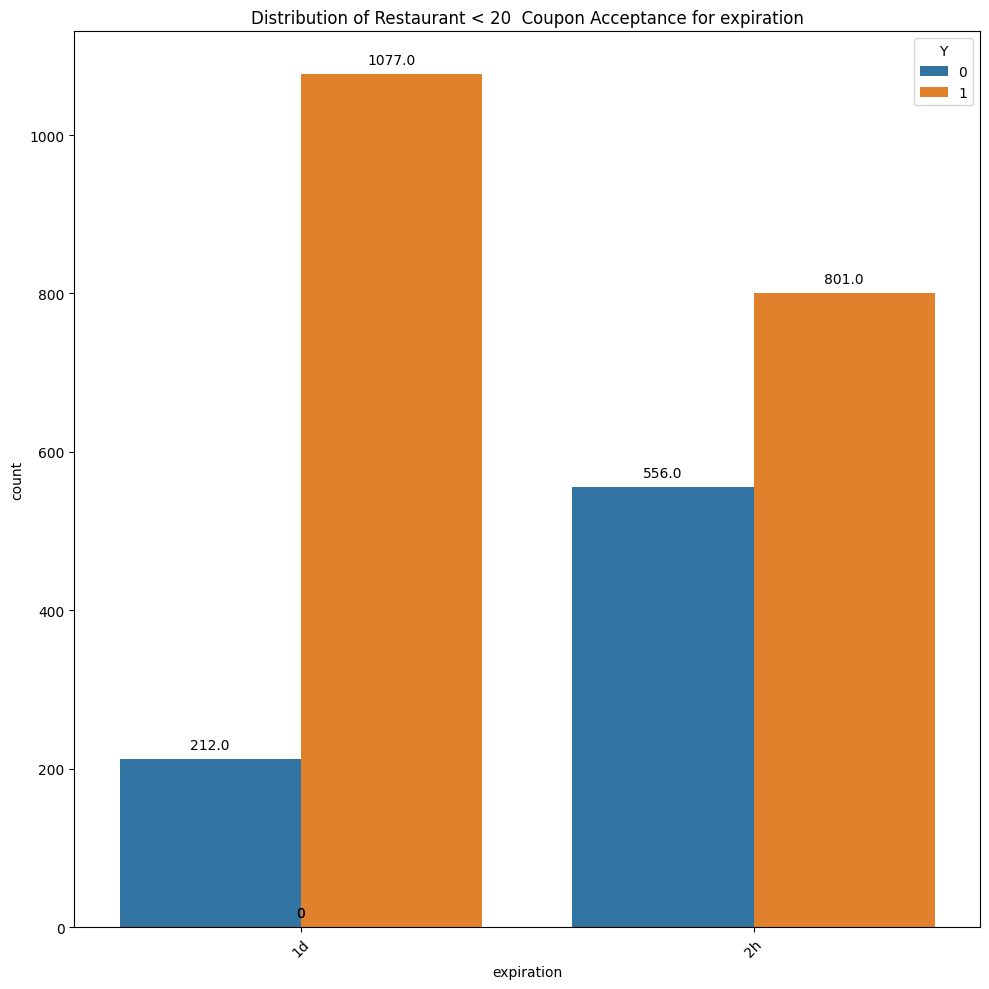

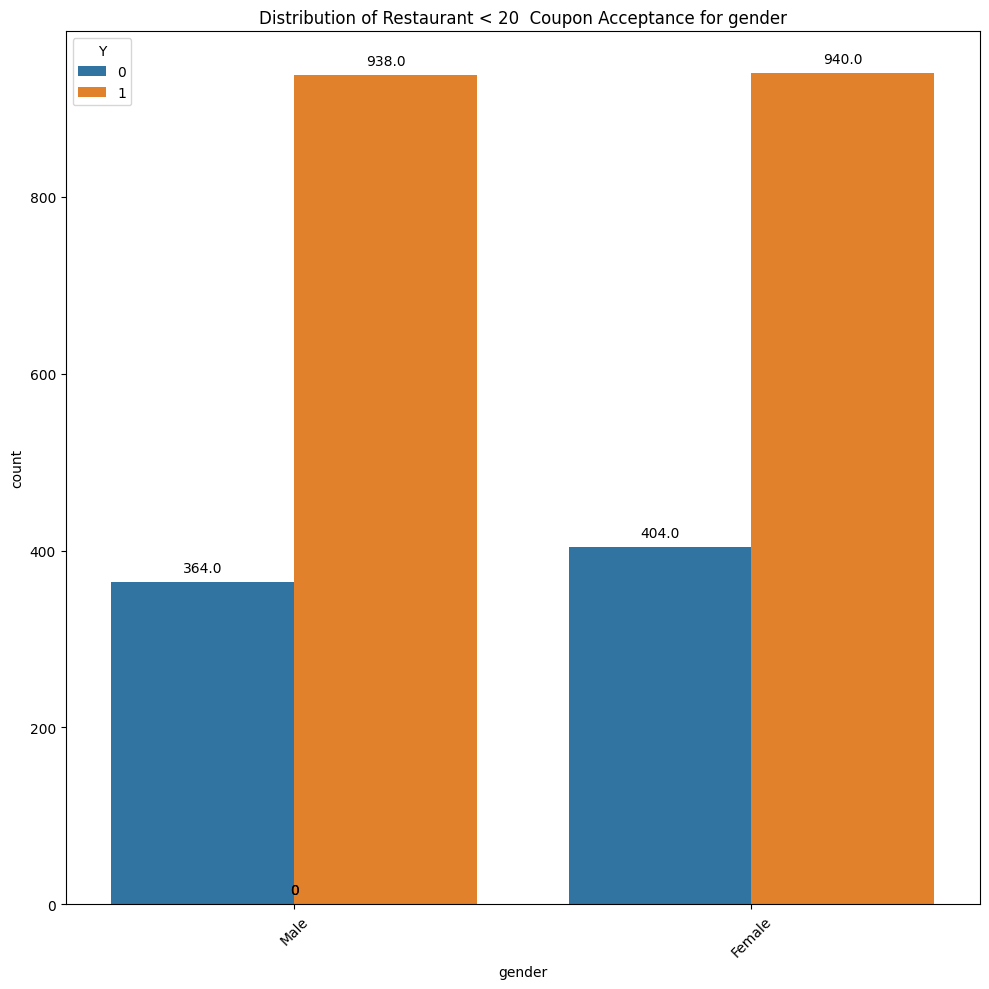

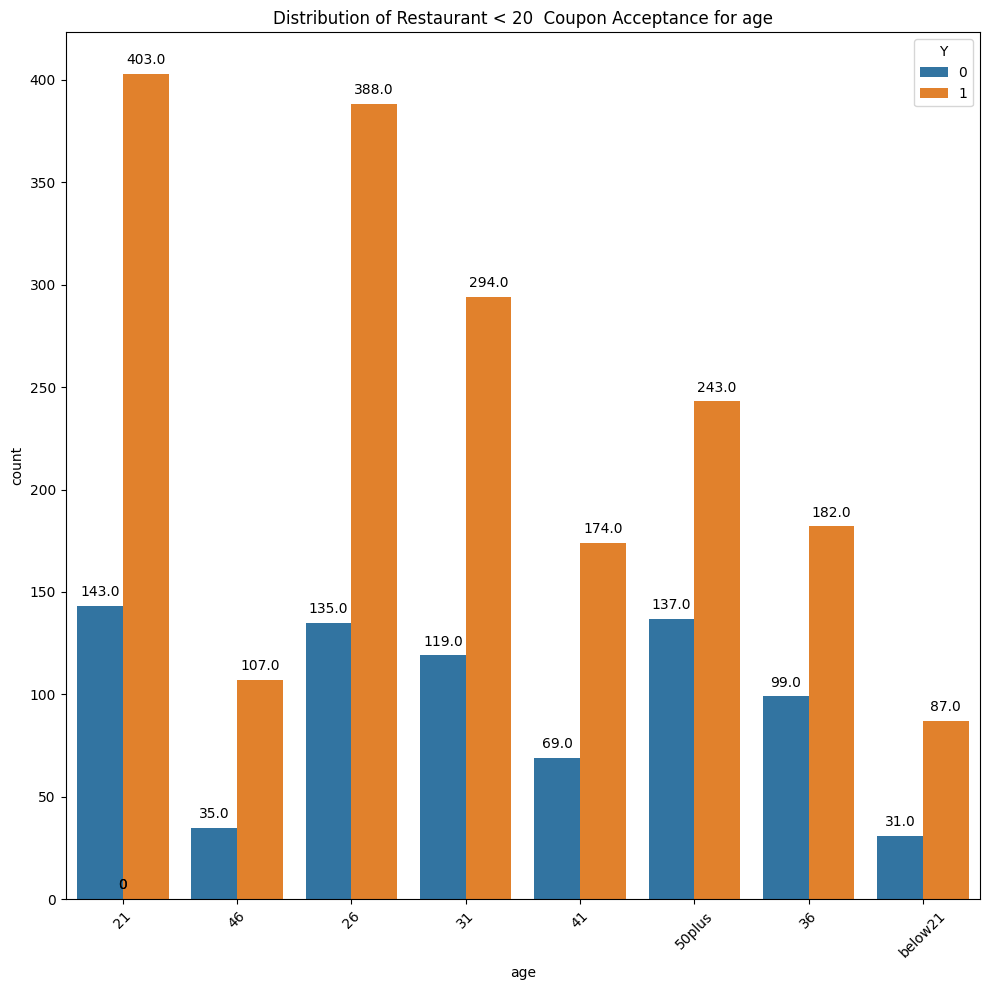

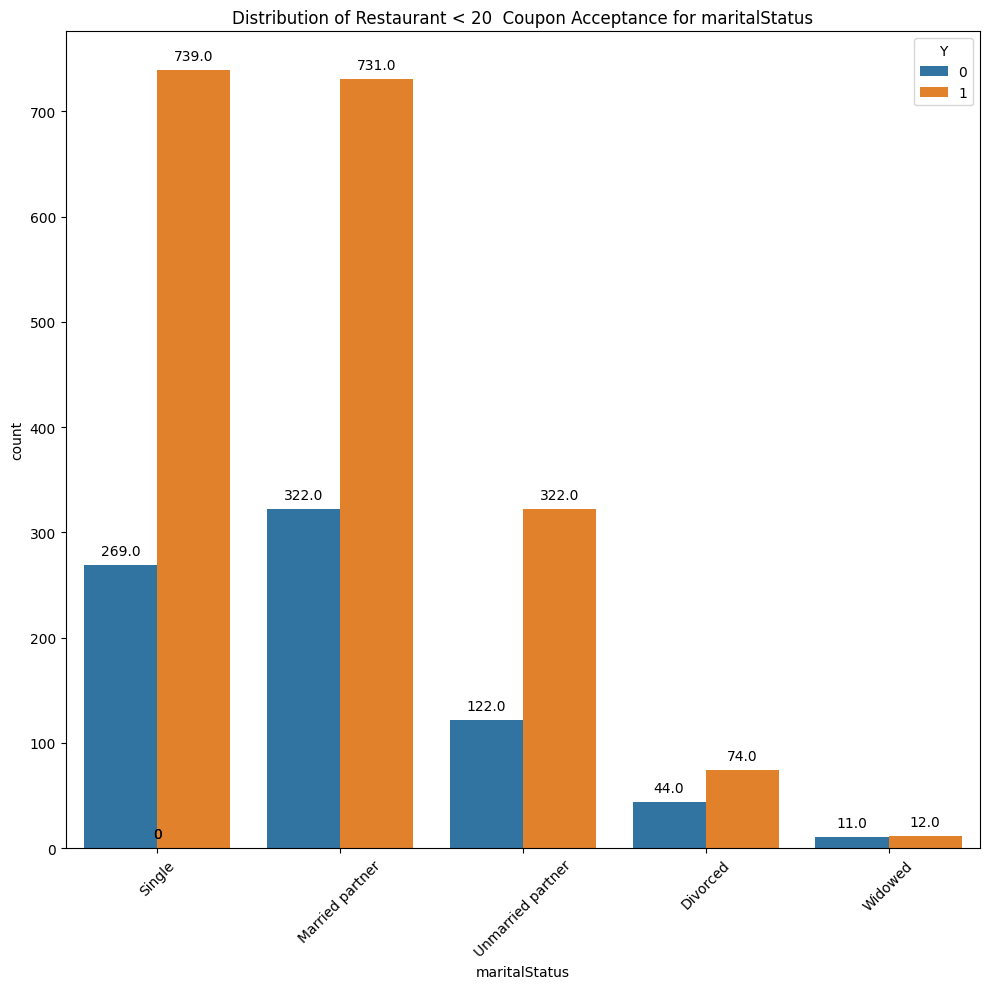

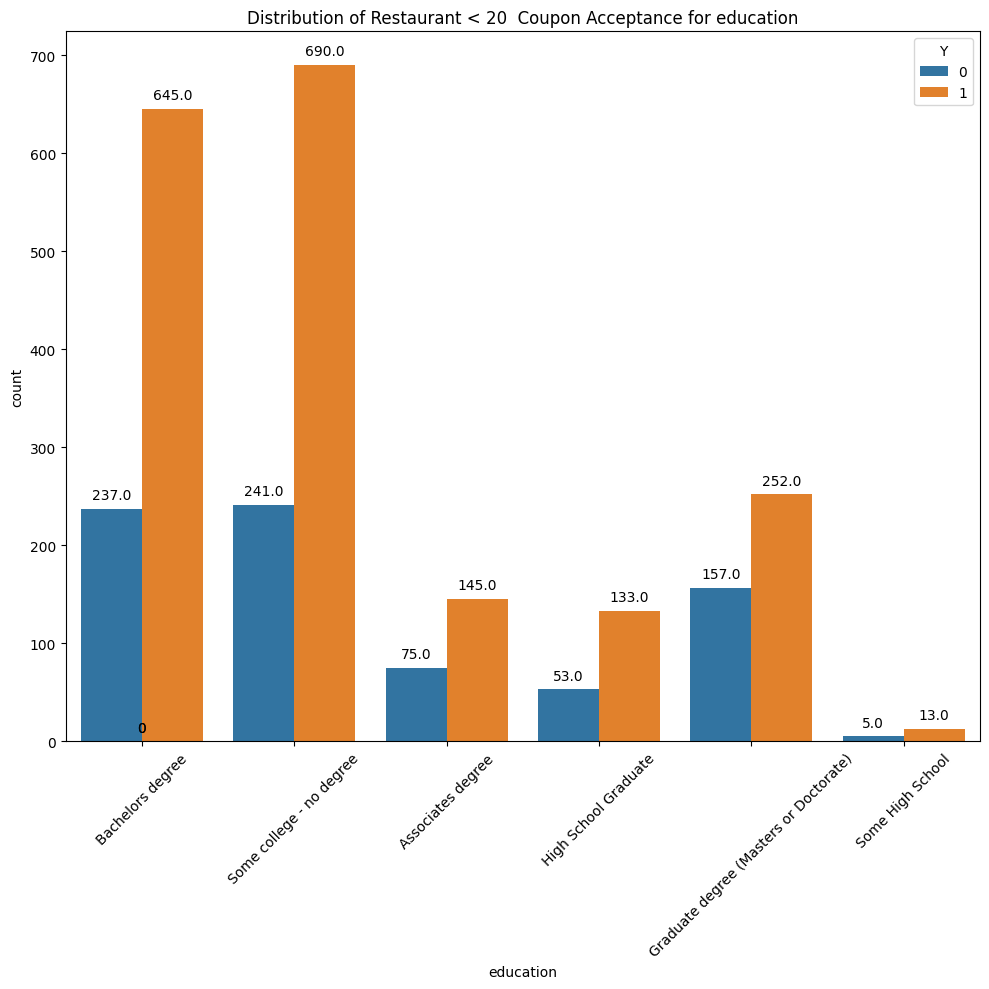

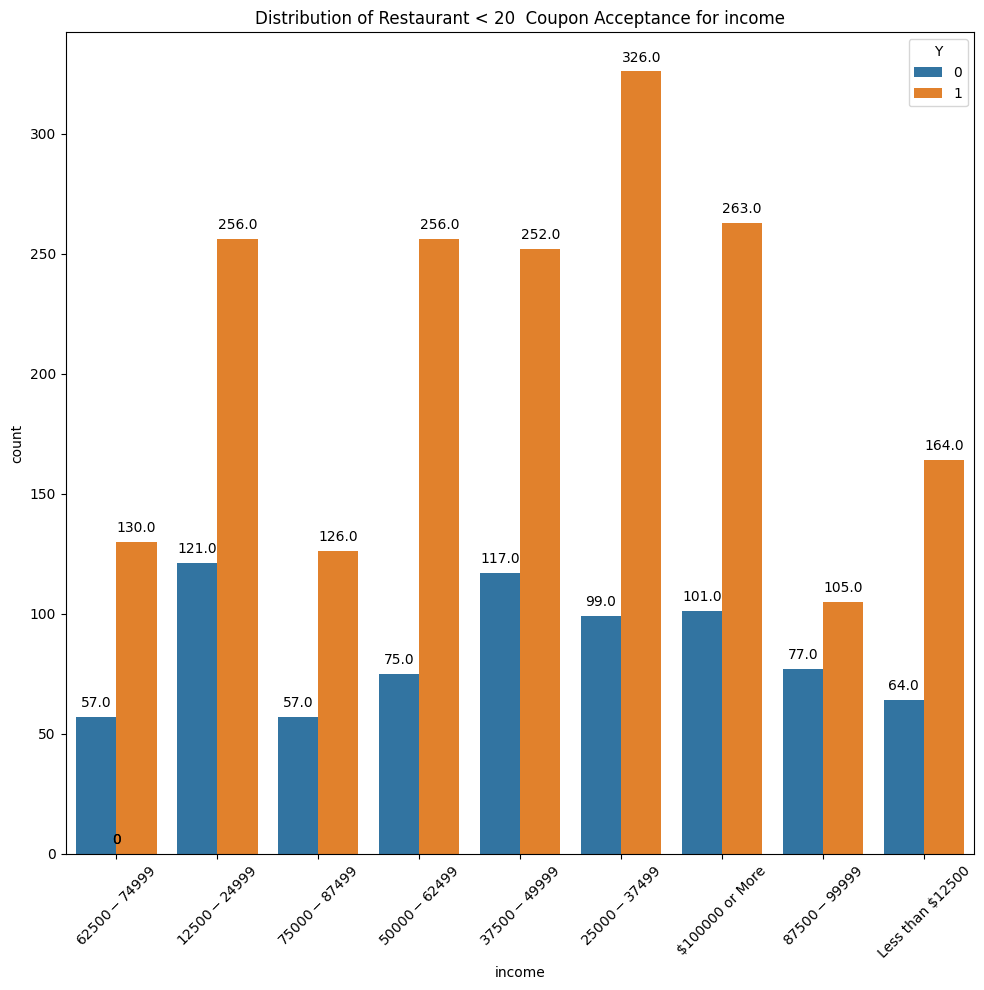

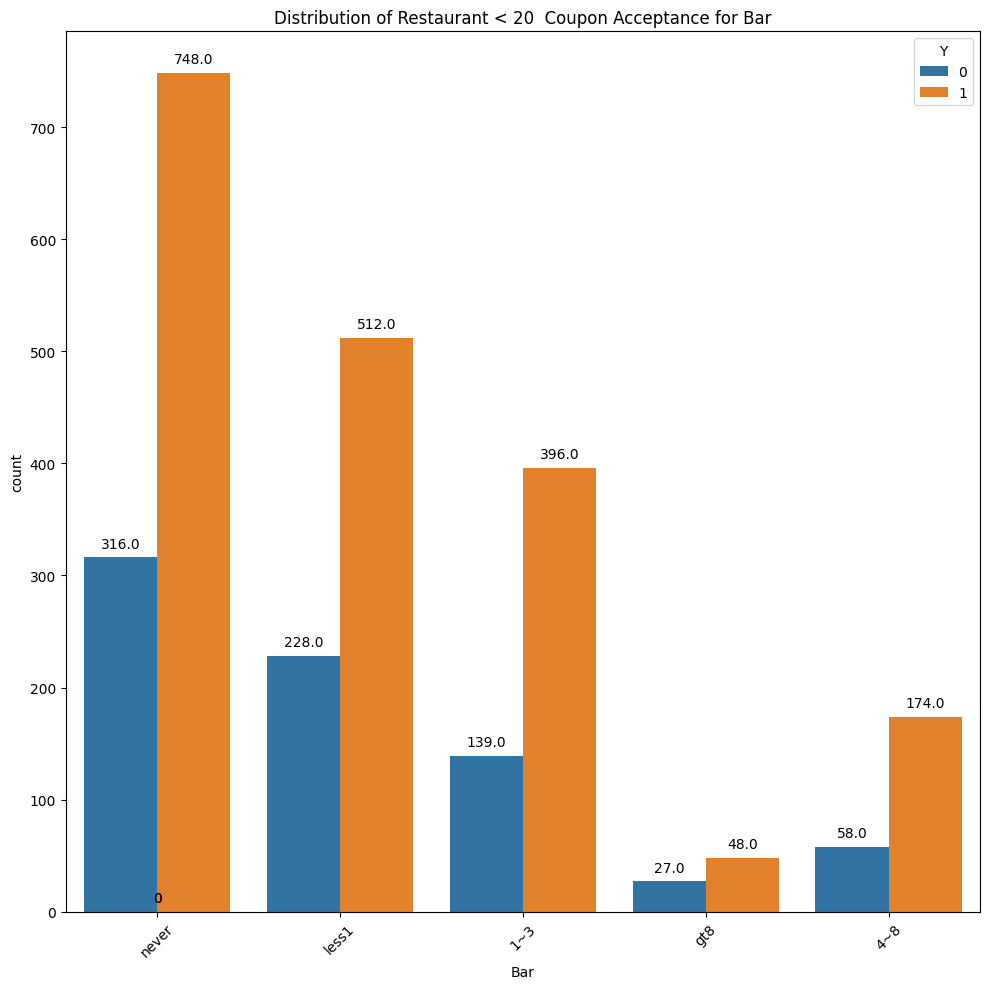

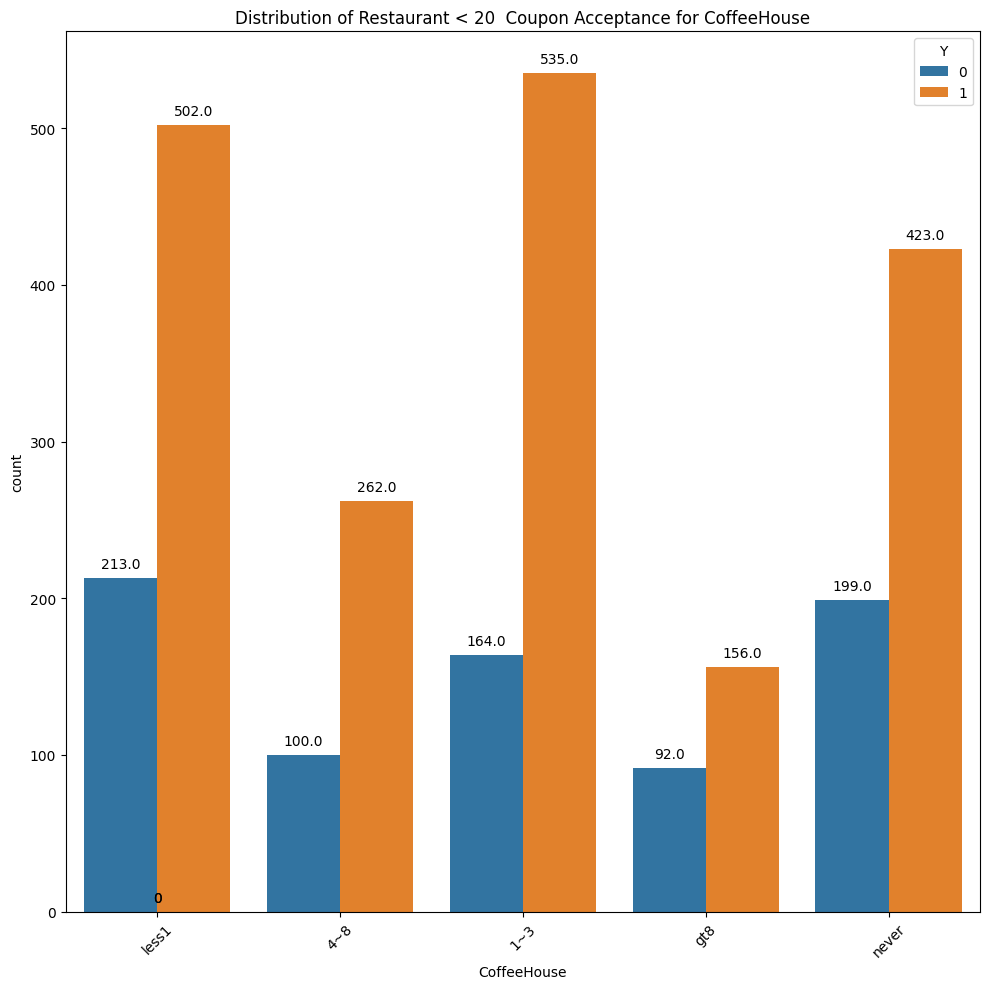

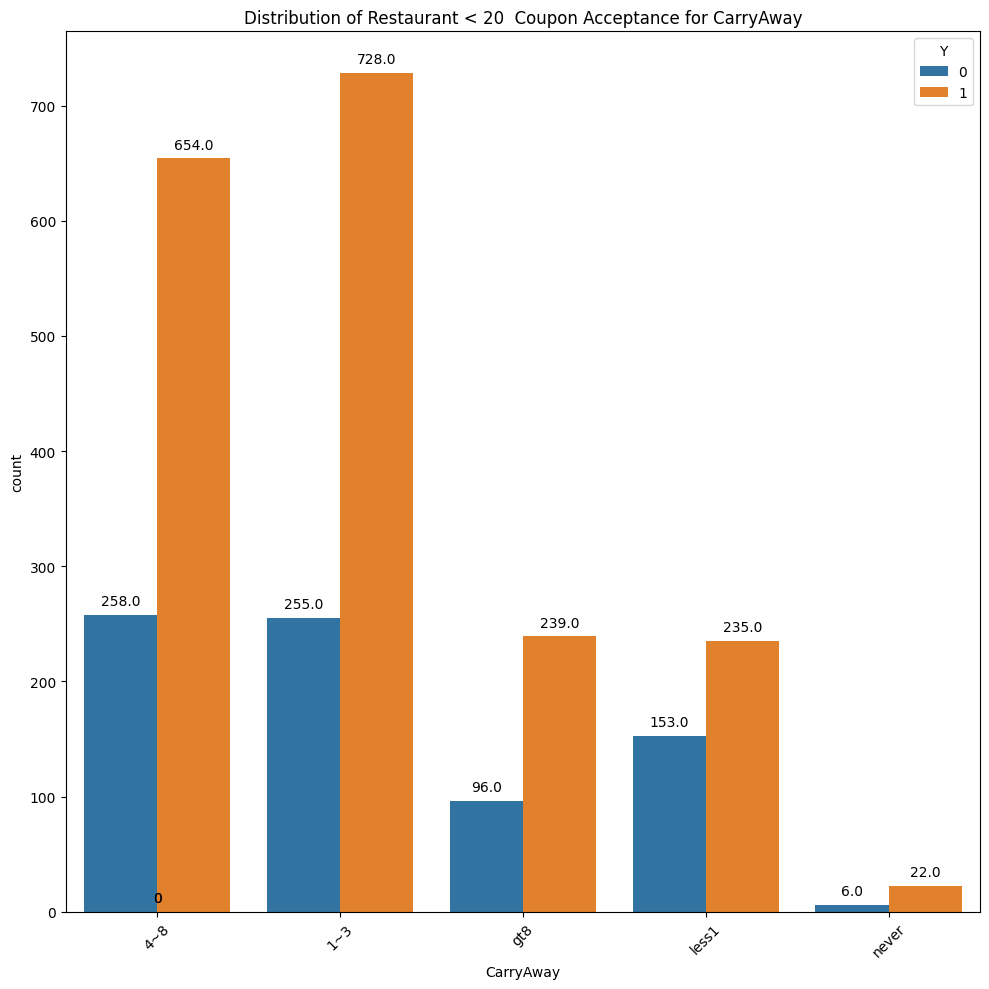

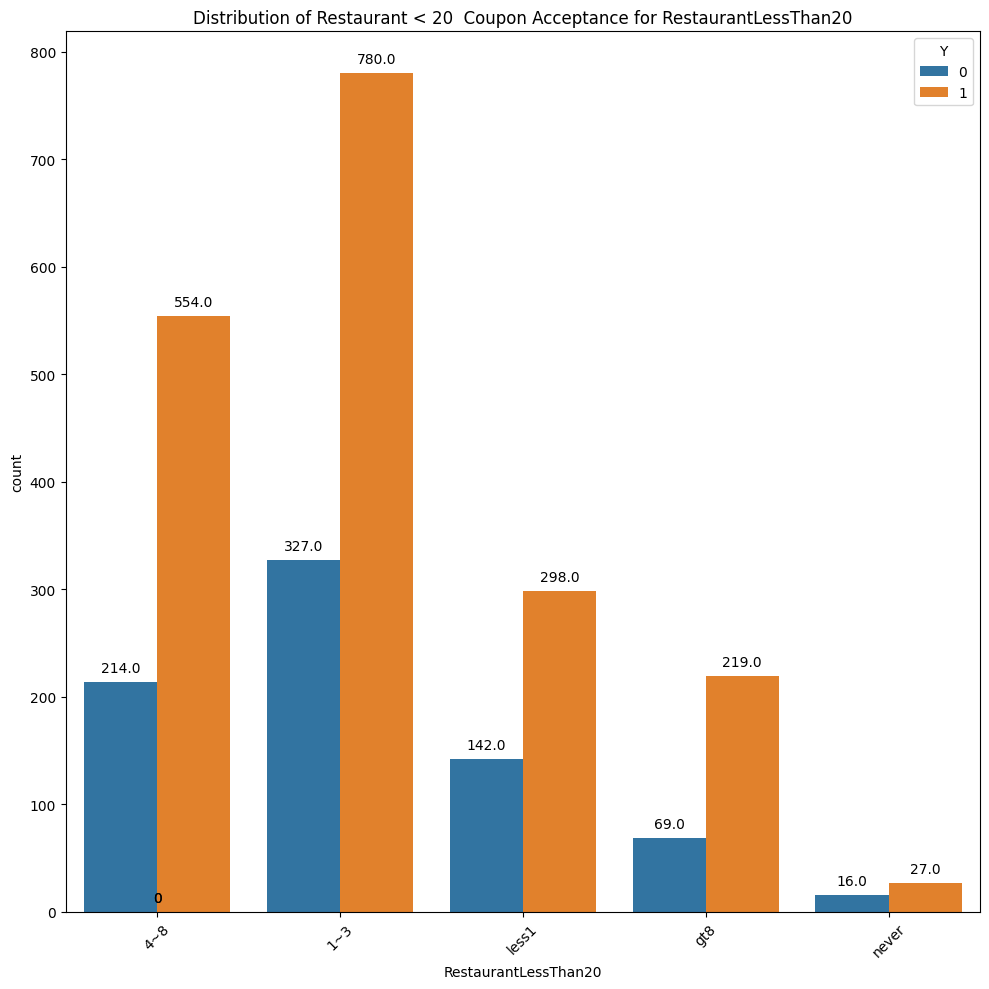

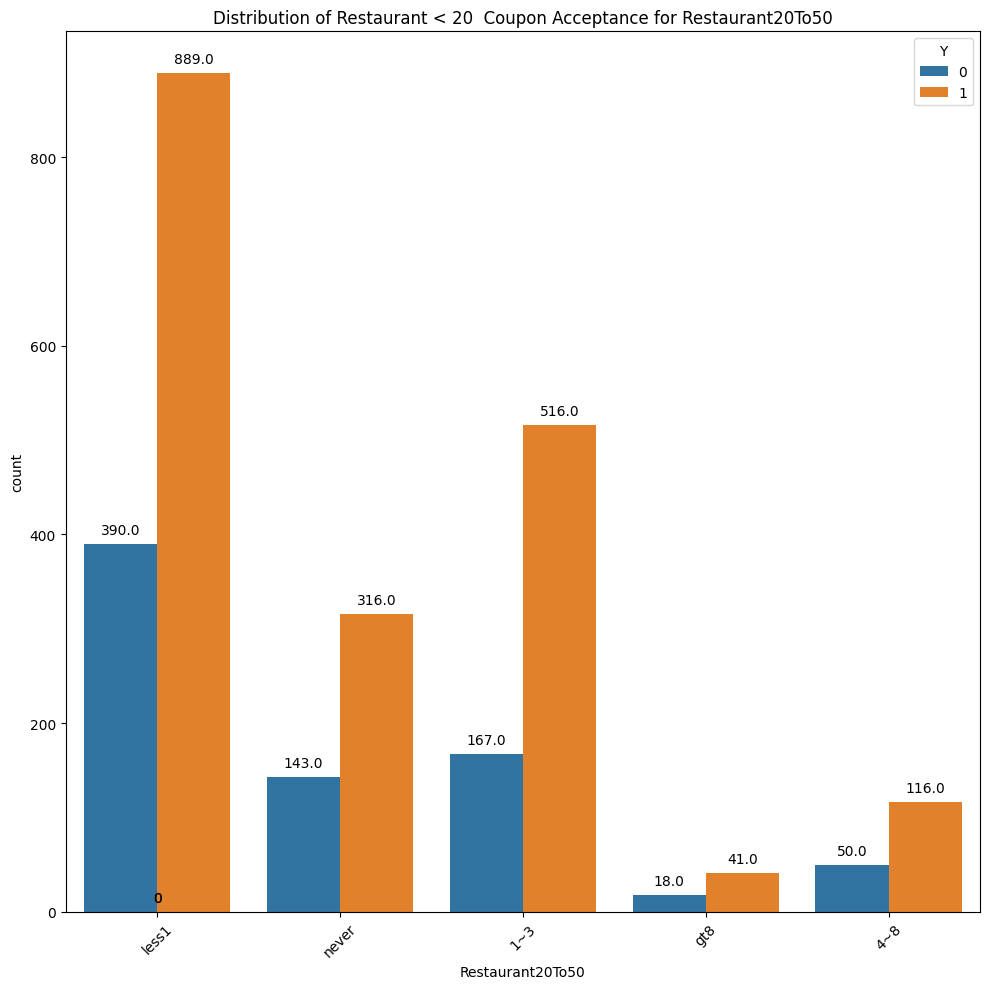

In [76]:
# Count plot of all categorical variables with Restaurant < 20  Coupons and with acceptance column as hue
plot_categorical_variables_pretty(res_lt_20_df, "Distribution of Restaurant < 20  Coupon Acceptance")

#### Based on the distribution, we can observe that they are more likely to accept 'Restaurant < 20' Coupon when

1. The weather is sunny. Higher number of coupons were offerred in sunny weather and acceptance rate is also high as compared to snowy & rainy weathers.
2. The destination is 'No Urgent Place'
3. Coupon expiration time is 1 day

**I am not sure why I am seeing '0' near the first label for all distribution plots. I would appreciate the grader's help in figuring out what I need to change in the annotate function for fixing it.** 


#### Heatmap for Restaurant < 20' Coupons

We can draw a heatmap for correlating acceptance for integer features using the dataframe corr function. We can  use one hot encoding to split up some of the categorical variables so that they can be represented in the heatmap for correlation.

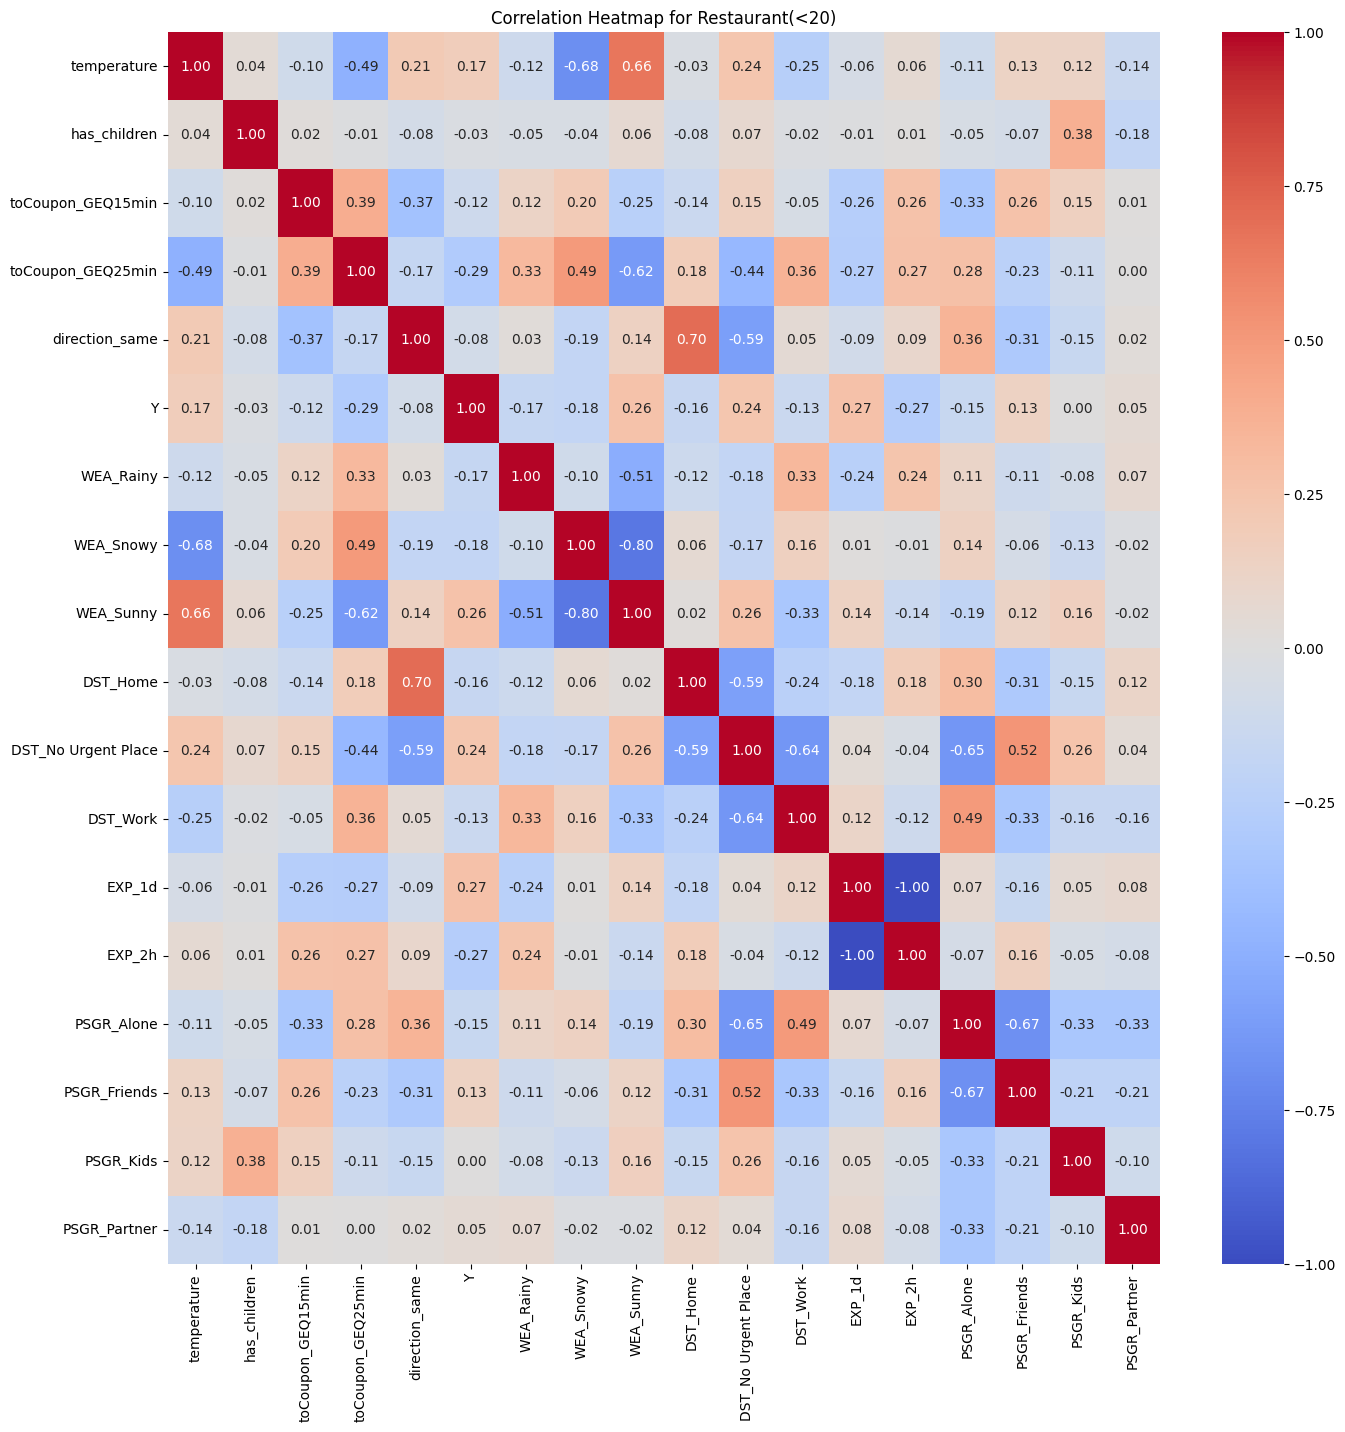

In [77]:
# one hot encoding for weather, destination, expiration and passenger columns
cols_to_one_hot_encode = [['weather','WEA'], ['destination', 'DST'],['expiration', 'EXP'],['passenger', 'PSGR']]
res_lt_20_df = data[data['coupon'] == "Restaurant(<20)"]
for feature in cols_to_one_hot_encode:
    res_lt_20_df = one_hot_encode(res_lt_20_df, feature[0], feature[1])
draw_heatmap(res_lt_20_df, "Restaurant(<20)")

##### Observations:

1. We see higher correlation to acceptance when the weather is Sunny, destination is 'No Urgent Place' and the coupon expiration is 1 day
2. Temperature  has good coorelation with the acceptance rate.
3. The coupon has negative correlation when the restaurant is 25 mins away and the coupon expiry time is 2 hours.

### Finding Correlation between Categorical Variables using Chi-Square Test

We can also use Chi-Square test to find correlation between categorical variables.  In this test, we estimate the probability of null hypotheses. The null hypothesis assumes that two categorical variables are not correlated. When the probability of the null hypothesis  is < 0.05 then the  two categorical variables are correlated to each other.

In order to find which features are contributing to acceptance, we need to figure out  features that correlate to the acceptance column Y. Since we have a lot of categorical features and the acceptance column can be considered a binary categorical column, we can use the chi-square test to find correlation between two categorical variables.



In [78]:
from scipy.stats import chi2_contingency       

In [79]:
def check_chi_sq_categorical_corr_check(df, x, y):
    cross_tab = pd.crosstab(index=df[x], columns=df[y])
    chi_sq_result = chi2_contingency(cross_tab,)
    p, x = chi_sq_result[1], " is correlated" if chi_sq_result[1] < 0.05 else "is not correlated"
    return p,x

In [80]:
def check_corr_for_categorical_columns_with_acceptance(df, log_str_prefix):
    for col in df.columns:
        if(df[col].dtype in ['object', 'category']):
            p,x = check_chi_sq_categorical_corr_check(df, col, 'Y')
            if (x==" is correlated"):
                print(log_str_prefix, "Column:", col, x, "to the acceptance column Y")
        

In [81]:
# check which categorical features are correlated to the accpetance column Y

check_corr_for_categorical_columns_with_acceptance(data[data['coupon'] == "Restaurant(<20)"], "Restaurant(<20) Coupons:")

Restaurant(<20 Coupons: Column: destination  is correlated to the acceptance column Y
Restaurant(<20 Coupons: Column: passenger  is correlated to the acceptance column Y
Restaurant(<20 Coupons: Column: weather  is correlated to the acceptance column Y
Restaurant(<20 Coupons: Column: time  is correlated to the acceptance column Y
Restaurant(<20 Coupons: Column: expiration  is correlated to the acceptance column Y
Restaurant(<20 Coupons: Column: age  is correlated to the acceptance column Y
Restaurant(<20 Coupons: Column: maritalStatus  is correlated to the acceptance column Y
Restaurant(<20 Coupons: Column: education  is correlated to the acceptance column Y
Restaurant(<20 Coupons: Column: occupation  is correlated to the acceptance column Y
Restaurant(<20 Coupons: Column: income  is correlated to the acceptance column Y
Restaurant(<20 Coupons: Column: CoffeeHouse  is correlated to the acceptance column Y
Restaurant(<20 Coupons: Column: CarryAway  is correlated to the acceptance column 